In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def gaussian_kernel(diff: np.ndarray, sigma: float = 0.1) -> float:
    return np.exp(-0.5 * sigma * diff**2)

In [76]:
from functools import partial

def conditional_mcmd(z: np.ndarray, X: np.ndarray, Z: np.ndarray, X_prime: np.ndarray, Z_prime: np.ndarray, lmbda: float = 0.01, sigma: float = 0.1) -> float:
    
    k = partial(gaussian_kernel, sigma=sigma)
    n = len(Z)
    m = len(Z_prime)

    K_Z = k(Z.reshape(-1, 1) - Z.reshape(1, -1))
    K_Z_prime = k(Z_prime.reshape(-1, 1) - Z_prime.reshape(1, -1))

    W_Z = np.linalg.inv(K_Z + n * lmbda * np.eye(n))
    W_Z_prime = np.linalg.inv(K_Z_prime + m * lmbda * np.eye(m))

    K_X = k(X.reshape(-1, 1) - X.reshape(1, -1))
    K_X_prime = k(X_prime.reshape(-1, 1) - X_prime.reshape(1, -1))
    K_X_X_prime = k(X.reshape(-1, 1) - X_prime.reshape(1, -1))
    
    k_Z = k(Z - z)
    k_Z_prime = k(Z_prime - z)

    first_term = k_Z.T @ W_Z @ K_X @ W_Z.T @ k_Z
    second_term = 2*k_Z.T @ W_Z @ K_X_X_prime @ W_Z_prime.T @ k_Z_prime
    third_term = k_Z_prime.T @ W_Z_prime @ K_X_prime @ W_Z_prime.T @ k_Z_prime

    return first_term - second_term + third_term

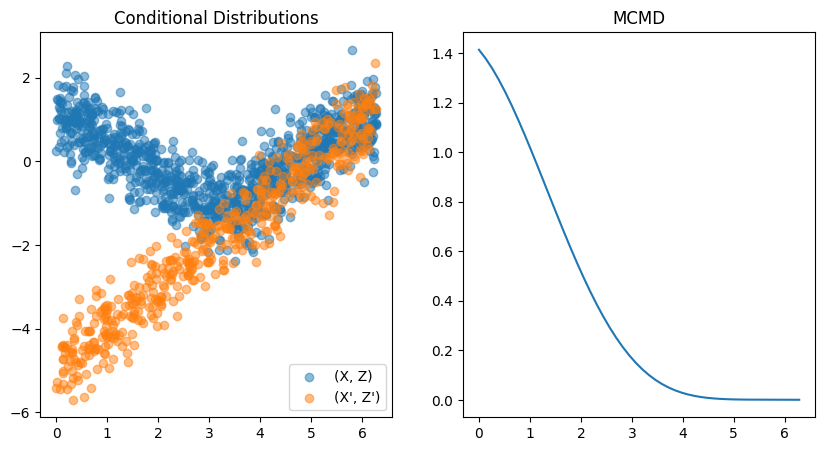

In [80]:
n = 1000
m = 500
z = np.random.uniform(0, 2*np.pi, size=n)
x = np.random.normal(loc=np.cos(z), scale=0.5)


z_prime = np.random.uniform(0, 2*np.pi, size=m)
x_prime = np.random.normal(loc=(z_prime - 5), scale=0.5)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title("Conditional Distributions")
axs[0].scatter(z, x, alpha=0.5, label="(X, Z)")
axs[0].scatter(z_prime, x_prime, alpha=0.5, label="(X', Z')")
axs[0].legend()

zvals = np.linspace(0, 2*np.pi)
mcmd = [conditional_mcmd(zval, x, z, x_prime, z_prime) for zval in zvals]

axs[1].set_title("MCMD")
axs[1].plot(zvals, mcmd)
plt.show()